In [12]:
import numpy as np
from matplotlib import pyplot as plt
import math
from scipy import integrate
import seaborn as sb

In [13]:
k=8.99e9
q=1.6e-19

##Calculates Potential at a particular coordinate "coord" due to a given charge "q" located at "point"

def V(q,point,coord):
    rx=coord[0]-point[0]
    ry=coord[1]-point[1]
    r=np.sqrt(rx**2+ry**2)
    
    V=k*q/r
    
    return V


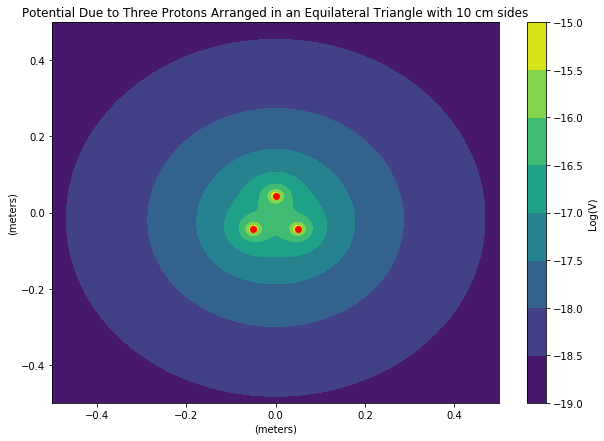

In [131]:
point1=[-.05,-.05*np.sqrt(3)/2.0]
point2=[.05,-.05*np.sqrt(3)/2.0]
point3=[0,.05*np.sqrt(3)/2.0]

x=np.linspace(-0.5,0.5,501)
y=np.linspace(0.5,-0.5,501)
xx,yy= np.meshgrid(x,y)

def Vtotal(xx,yy):
    V1=V(q,point1,[xx,yy])
    V2=V(q,point2,[xx,yy])
    V3=V(q,point3,[xx,yy])
    return V1+V2+V3

Vtot=Vtotal(xx,yy)

h=plt.contourf(x,y,np.log(Vtot),[-19,-18.5,-18,-17.5,-17,-16.5,-16,-15.5,-15])
plt.colorbar(h,label="Log(V)")
plt.scatter(point1[0],point1[1], color='red')
plt.scatter(point2[0],point2[1], color='red')
plt.scatter(point3[0],point3[1], color='red')
plt.title("Potential Due to Three Protons Arranged in an Equilateral Triangle with 10 cm sides")
plt.xlim(-.5,.5)
plt.ylim(-.5,.5)
plt.xlabel("(meters)")
plt.ylabel("(meters)")
plt.rcParams["figure.figsize"]=[10,7]

plt.show()


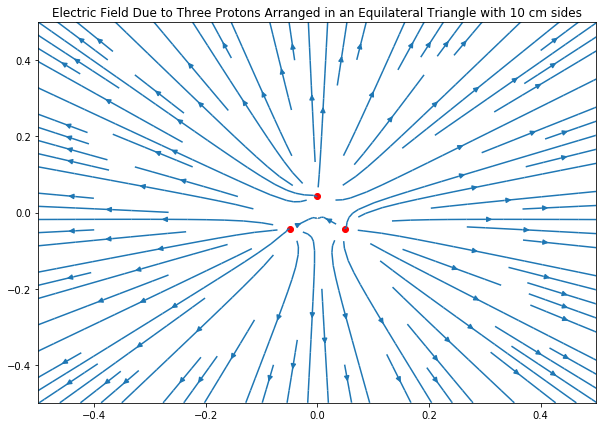

In [135]:
##Calculating Electric Field

h=.002


#Find the derivative, central point method
dVdx= (Vtotal(xx+h/2,yy)-Vtotal(xx-h/2,yy))/h
dVdy= (Vtotal(xx,yy+h/2)-Vtotal(xx,yy-h/2))/h


##plotting the point charges
plt.scatter(point1[0],point1[1], color='red')
plt.scatter(point2[0],point2[1], color='red')
plt.scatter(point3[0],point3[1], color='red')

##plotting the electric field lines
plt.streamplot(xx,yy,-dVdx,-dVdy)
plt.title("Electric Field Due to Three Protons Arranged in an Equilateral Triangle with 10 cm sides")

plt.xlim(-.5,.5)
plt.ylim(-.5,.5)
plt.rcParams["figure.figsize"]=[10,7]


In [133]:
##Part B two rings of charge!!
##See notes for derivation
#Set charge of the rings
Q=8

#Given radii of the rings
r1=0.02
r2=0.15

#line charge density of the rings
qdensity1= Q/(2*math.pi*r1)      
qdensity2= Q/(2*math.pi*r2)

#Potential at (xx,yy) due to a point charge at "theta" along the ring of charge with radius "r", charge density "qdensity"
def dVring(theta,qdensity,r,xx,yy):
    rprime=np.sqrt((xx-r*np.cos(theta))**2+(yy-r*np.sin(theta))**2)
    return k*qdensity*r/rprime


#Total potential at point xx,yy integrating along the two rings of charge from 0 to 2pi
#Integration method is Simpson's rule, due to high accuracy with low N
#Furthermore, I know how to write the code for Simpson's rule and fit all the arguments in
#I chose an N=1000 for the integral


def Simpson(a,b,N,qdensity,r,xx,yy):
    h=(b-a)/N
    s=dVring(a,qdensity,r,xx,yy)+dVring(b,qdensity,r,xx,yy)
    for k in range(1,int(N)):
        if (k%2!=0):
            s+=4*dVring(a+k*h,qdensity,r,xx,yy)
        else:
            s+=2*dVring(a+k*h,qdensity,r,xx,yy)
    return 1/3*h*s


#Integrates the total potential due to the two rings
def Vring(xx,yy):
    a=0
    b=2*math.pi
    N=1000
    
    Vring1=Simpson(a,b,N,qdensity1,r1,xx,yy)
    Vring2=Simpson(a,b,N,qdensity2,r2,xx,yy)
    return Vring1+Vring2




In [114]:
x=np.linspace(-0.5,0.5,501)
y=np.linspace(0.5,-0.5,501)
xx,yy= np.meshgrid(x,y)

z=Vring(xx,yy)


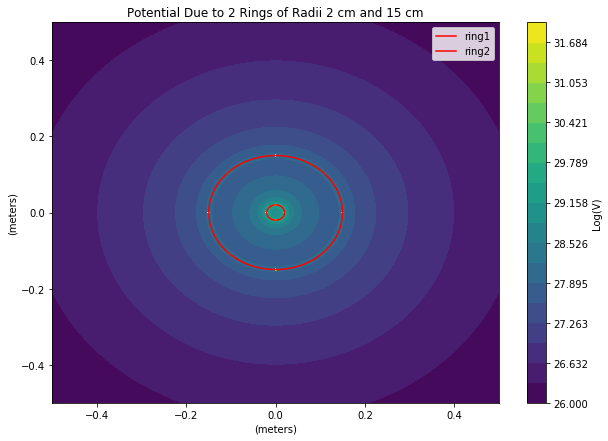

In [134]:
#plotting the potential on contour plot
h=plt.contourf(x,y,np.log(z),np.linspace(26,32,20))
plt.colorbar(h,label="Log(V)")

#plotting the rings
thetas=np.linspace(0,2*math.pi,50)
x1s=r1*np.cos(thetas)
y1s=r1*np.sin(thetas)
x2s=r2*np.cos(thetas)
y2s=r2*np.sin(thetas)
plt.plot(x1s,y1s,color="red", label="ring1")
plt.plot(x2s,y2s,color="red", label="ring2")
plt.legend()
plt.title("Potential Due to 2 Rings of Radii 2 cm and 15 cm")
plt.xlim(-.5,.5)
plt.ylim(-.5,.5)
plt.xlabel("(meters)")
plt.ylabel("(meters)")
plt.rcParams["figure.figsize"]=[10,7]


plt.show()


In [138]:
##Calculating Electric Field

h=.002


#Find the derivative, central point method
dVdx= (Vring(xx+h/2,yy)-Vring(xx-h/2,yy))/h
dVdy= (Vring(xx,yy+h/2)-Vring(xx,yy-h/2))/h


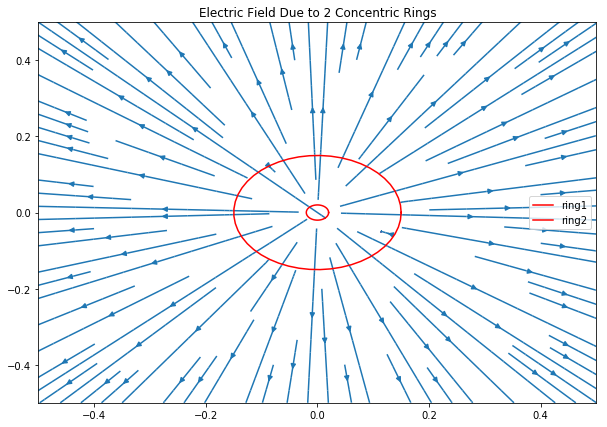

In [144]:
##plotting the electric field lines
plt.streamplot(xx,yy,-dVdx,-dVdy)
plt.title("Electric Field Due to 2 Concentric Rings")

##plotting the rings
plt.plot(x1s,y1s,color="red", label="ring1")
plt.plot(x2s,y2s,color="red", label="ring2")
plt.legend()


plt.xlim(-.5,.5)
plt.ylim(-.5,.5)
plt.rcParams["figure.figsize"]=[10,7]